In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
%matplotlib inline

In [33]:
df=pd.read_csv('./dataset/insurance.csv')

In [34]:
df.sample(5)

,age,sex,bmi,children,smoker,region,expenses
546,28,male,35.4,0,no,northeast,3268.85
1337,61,female,29.1,0,yes,northwest,29141.36
541,20,female,31.8,2,no,southeast,3056.39
374,20,male,33.3,0,no,southeast,1391.53
552,62,male,21.4,0,no,southwest,12957.12


In [35]:
df.shape

(1338, 7)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [37]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [38]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [39]:
df=df.drop_duplicates()

In [40]:
df.shape

(1337, 7)

In [41]:
x_axis=['age','bmi','expenses','children']

C:\Users\Hridey\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hridey\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hridey\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level fun

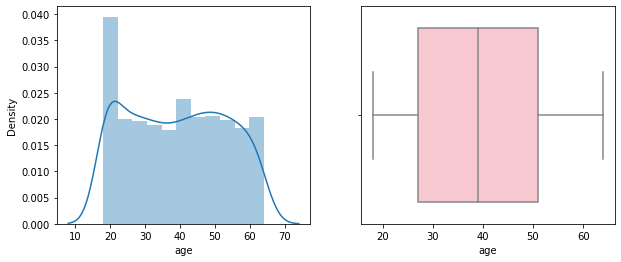

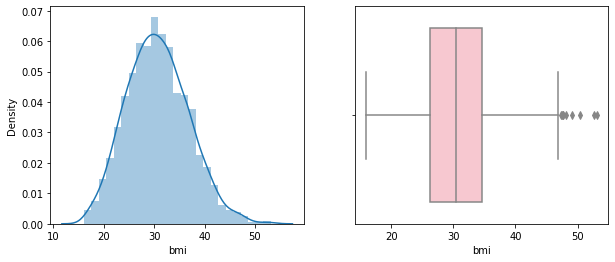

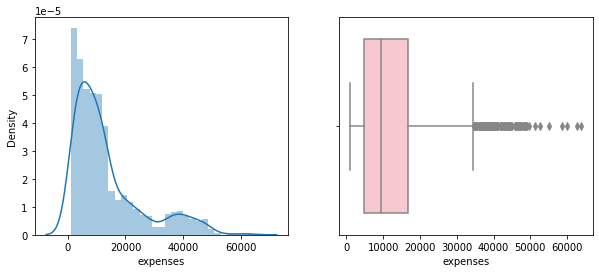

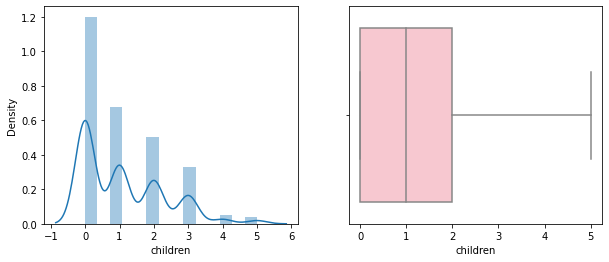

In [42]:
for x in x_axis:
    fig,axis=plt.subplots(1,2,figsize=(10,4))
    sns.distplot(df[x],ax=axis[0])
    sns.boxplot(df[x],ax=axis[1],color='pink',orient='h')

In [43]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [44]:
df['sex']=df.sex.map({'female':0,'male':1})

In [45]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [46]:
df['smoker']=df.smoker.map({'yes':1,'no':0})

In [29]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [48]:
df['region']=df.region.map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [49]:
df.sample(5)

,age,sex,bmi,children,smoker,region,expenses
1044,55,1,35.2,1,0,4,11394.07
1107,50,0,26.2,2,0,3,10493.95
1315,18,1,28.3,1,0,4,11272.33
1298,33,1,27.5,2,0,3,5261.47
1128,34,1,32.8,1,0,1,14358.36


In [52]:
X=df.drop('expenses',axis=1)

In [57]:
Y=pd.DataFrame(df['expenses'])

In [58]:
Y

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [62]:
X_train.shape

(1069, 6)

In [64]:
from sklearn.linear_model import LinearRegression

In [66]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [67]:
y_pred=lr.predict(X_test)

In [69]:
from sklearn.metrics import r2_score

In [72]:
score=r2_score(Y_test,y_pred)
score

0.8068280291899952

In [73]:
from sklearn.svm import SVR

In [74]:
svr=SVR()

In [75]:
svr.fit(X_train,Y_train)
y_pred=svr.predict(X_test)
r2_score(Y_test,y_pred)

C:\Users\Hridey\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.1344469486786597

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf=RandomForestRegressor()

In [78]:
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
r2_score(Y_test,Y_pred)

C:\Users\Hridey\AppData\Local\Temp\ipykernel_8496\1438423214.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


0.8799446476089156

In [103]:
rf.fit(X_train,Y_train)

C:\Users\Hridey\AppData\Local\Temp\ipykernel_8496\1283773718.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestRegressor()

In [104]:
df.sample()

,age,sex,bmi,children,smoker,region,expenses
776,40,1,32.3,2,0,3,6986.7


In [107]:
x_check=pd.DataFrame(df.iloc[776]).drop('expenses').transpose()

In [111]:
rf.predict(x_check)

array([9178.7869])

In [115]:
from xgboost import XGBRegressor

In [116]:
model = XGBRegressor()

In [117]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [119]:
y_pred=model.predict(X_test)
r2_score(Y_test,y_pred)

0.8571783182498693

In [120]:
import joblib
joblib.dump(rf,'model')

['model']